In [3]:
!pip install --user beautifulsoup4
!pip install --user lxml
!pip install --user requests
!pip install --user pandas
!pip install --user geopy
!pip install --user folium
!pip install --user sklearn
!pip install --user matplotlib

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/Districts_of_Yerevan').text
soup=BeautifulSoup(source, 'lxml')
table = str(soup.table)
display_html(table,raw=True)

District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
Ajapnyak,Աջափնյակ,"108,282","109,100",25.82
Arabkir,Արաբկիր,"117,704","115,800",13.29
Avan,Ավան,"53,231","53,100",7.26
Davtashen,Դավթաշեն,"42,380","42,500",6.47
Erebuni,Էրեբունի,"123,092","126,500",47.49
Kanaker-Zeytun,Քանաքեռ-Զեյթուն,"73,886","74,100",7.73
Kentron,Կենտրոն,"125,453","125,700",13.35
Malatia-Sebastia,Մալաթիա-Սեբաստիա,"132,900","135,900",25.16
Nork-Marash,Նորք-Մարաշ,"12,049","11,800",4.76
Nor Nork,Նոր Նորք,"126,065","130,300",14.11


In [5]:
df_source = pd.read_html(table)
df=df_source[0]
df.head()

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²)
0,Ajapnyak,Աջափնյակ,108282,109100,25.82
1,Arabkir,Արաբկիր,117704,115800,13.29
2,Avan,Ավան,53231,53100,7.26
3,Davtashen,Դավթաշեն,42380,42500,6.47
4,Erebuni,Էրեբունի,123092,126500,47.49


In [6]:
df.shape

(12, 5)

In [7]:
df_coordinates = pd.read_csv('districts.csv')
df_coordinates.head()

,District,Latitude,Longitude
0,Ajapnyak,40.211567,44.416573
1,Arabkir,40.212991,44.480189
2,Avan,40.223600,44.557040
3,Davtashen,40.224784,44.465119
4,Erebuni,40.131373,44.515156


In [8]:
df_coordinates.columns=['District','Latitude','Longitude']
df_total = pd.merge(df, df_coordinates, on='District')
df_total

,District,Armenian,Population (2011 census),Population (2016 estimate),Area (km²),Latitude,Longitude
0,Ajapnyak,Աջափնյակ,108282,109100,25.82,40.211567,44.416573
1,Arabkir,Արաբկիր,117704,115800,13.29,40.212991,44.480189
2,Avan,Ավան,53231,53100,7.26,40.223600,44.557040
3,Davtashen,Դավթաշեն,42380,42500,6.47,40.224784,44.465119
4,Erebuni,Էրեբունի,123092,126500,47.49,40.131373,44.515156
5,Kanaker-Zeytun,Քանաքեռ-Զեյթուն,73886,74100,7.73,40.214590,44.502848
6,Kentron,Կենտրոն,125453,125700,13.35,40.178103,44.494913
7,Malatia-Sebastia,Մալաթիա-Սեբաստիա,132900,135900,25.16,40.185313,44.355868
8,Nork-Marash,Նորք-Մարաշ,12049,11800,4.76,40.180059,44.522229
9,Nor Nork,Նոր Նորք,126065,130300,14.11,40.183795,44.541669


In [9]:
address = 'Yerevan, Armenia'
geolocator = Nominatim(user_agent="Yerevan")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Yerevan, Armenia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Yerevan, Armenia are 40.1776121, 44.5125849.


In [10]:
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    label = district
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

In [11]:
CLIENT_ID = 'VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB' # my Foursquare ID
CLIENT_SECRET = 'O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: VNWC5NGFMAXRA31IGYF10SB423XATFAMQEPVTD0RLCMJ4RGB
CLIENT_SECRET:O11DEZDTIXR3TSJHECUORJZQPQNR0QM0LIA3HSELA0HMUFOA


In [12]:
RADIUS = 1200
LIMIT = 1000

venues_list = []

for latitude, longitude, district in zip(df_total['Latitude'], df_total['Longitude'], df_total['District']):
    print("Getting venues for district {} with coordinates {},{}".format(district, latitude, longitude))

    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, RADIUS, LIMIT)

    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        district, 
        latitude, 
        longitude, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results
    ])

venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

if len(venues) > 0:
    venues.columns = ['District', 
                'District Latitude', 
                'District Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']

venues.head()

Getting venues for district Ajapnyak with coordinates 40.2115669,44.4165735
Getting venues for district Arabkir with coordinates 40.2129907,44.48018870000001
Getting venues for district Avan with coordinates 40.2235999,44.5570405
Getting venues for district Davtashen with coordinates 40.2247837,44.4651191
Getting venues for district Erebuni with coordinates 40.131373499999995,44.51515620000001
Getting venues for district Kanaker-Zeytun with coordinates 40.2145898,44.5028485
Getting venues for district Kentron with coordinates 40.1781026,44.4949131
Getting venues for district Malatia-Sebastia with coordinates 40.1853132,44.3558676
Getting venues for district Nork-Marash with coordinates 40.1800589,44.522228600000005
Getting venues for district Nor Nork with coordinates 40.1837946,44.541668900000005
Getting venues for district Nubarashen with coordinates 40.1027199,44.515232899999994
Getting venues for district Shengavit with coordinates 40.1353813,44.4306965


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza


In [13]:
venues.shape

(200, 7)

In [14]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 83 uniques categories.


In [15]:
# one hot encoding
yerevan_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yerevan_onehot['District'] = venues['District'] 

# move neighborhood column to the first column
fixed_columns = [yerevan_onehot.columns[-1]] + list(yerevan_onehot.columns[:-1])
yerevan_onehot = yerevan_onehot[fixed_columns]

yerevan_onehot.head()

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,...,Tea Room,Tennis Court,Theater,Tram Station,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arabkir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
yerevan_onehot.shape

(200, 84)

In [17]:
yerevan_grouped = yerevan_onehot.groupby('District').mean().reset_index()
yerevan_grouped

,District,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,...,Tea Room,Tennis Court,Theater,Tram Station,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio
0,Arabkir,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Avan,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Davtashen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Erebuni,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kanaker-Zeytun,0.000000,0.000000,0.117647,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Kentron,0.015873,0.000000,0.015873,0.015873,0.015873,0.015873,0.015873,0.000000,0.000000,...,0.000000,0.015873,0.015873,0.000000,0.000000,0.015873,0.015873,0.000000,0.015873,0.015873
6,Nor Nork,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Nork-Marash,0.000000,0.010989,0.000000,0.000000,0.032967,0.021978,0.010989,0.000000,0.021978,...,0.010989,0.010989,0.000000,0.000000,0.000000,0.000000,0.000000,0.010989,0.000000,0.000000


In [18]:
yerevan_grouped.shape

(8, 84)

In [19]:
num_top_venues = 5

for dist in yerevan_grouped['District']:
    print("----{}----".format(dist))
    temp = yerevan_grouped[yerevan_grouped['District'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arabkir----
                  venue  freq
0                 Plaza  0.25
1                  Park  0.25
2      Asian Restaurant  0.12
3  Fast Food Restaurant  0.12
4                Market  0.12


----Avan----
           venue  freq
0           Pool  0.25
1  Go Kart Track  0.25
2      BBQ Joint  0.25
3           Park  0.25
4          Plaza  0.00


----Davtashen----
             venue  freq
0       Restaurant  0.33
1         Gym Pool  0.17
2  Border Crossing  0.17
3      Golf Course  0.17
4             Pool  0.17


----Erebuni----
              venue  freq
0   Warehouse Store  0.33
1  Department Store  0.17
2            Market  0.17
3      Tram Station  0.17
4             Motel  0.17


----Kanaker-Zeytun----
                     venue  freq
0               Restaurant  0.18
1         Asian Restaurant  0.12
2              Pizza Place  0.12
3  Comfort Food Restaurant  0.06
4              Supermarket  0.06


----Kentron----
            venue  freq
0  Clothing Store  0.13
1      Restaurant 

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = yerevan_grouped['District']

for ind in np.arange(yerevan_grouped.shape[0]):
   district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yerevan_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head(12)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
1,Avan,Pool,Park,BBQ Joint,Go Kart Track,Food Court,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
2,Davtashen,Restaurant,Pool,Border Crossing,Golf Course,Gym Pool,Bakery,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market
3,Erebuni,Warehouse Store,Department Store,Tram Station,Market,Motel,Food Court,Donut Shop,Eastern European Restaurant,Electronics Store,Fast Food Restaurant
4,Kanaker-Zeytun,Restaurant,Pizza Place,Asian Restaurant,Gym / Fitness Center,Supermarket,Gym Pool,Comfort Food Restaurant,Fast Food Restaurant,Spa,Eastern European Restaurant
5,Kentron,Clothing Store,Restaurant,Museum,Hotel,Plaza,Lounge,Park,Diner,Yoga Studio,Furniture / Home Store
6,Nor Nork,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
7,Nork-Marash,Hotel,Café,Restaurant,Supermarket,Coffee Shop,Eastern European Restaurant,Pub,Plaza,Jazz Club,Bakery


In [22]:
from sklearn.metrics import silhouette_score

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster).fit(yerevan_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(yerevan_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.16840486957446438
For n_clusters=3, The Silhouette Coefficient is 0.16177333028255947
For n_clusters=4, The Silhouette Coefficient is 0.1614054579487245
For n_clusters=5, The Silhouette Coefficient is 0.12723661801962824
For n_clusters=6, The Silhouette Coefficient is 0.14328552220258284
For n_clusters=7, The Silhouette Coefficient is 0.06638615710657109


In [23]:
# set number of clusters
kclusters = 2

yerevan_grouped_clustering = yerevan_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yerevan_grouped_clustering)

# check cluster labels generated for each row in the data frame
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0])

In [24]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_.astype(int))
# district_venues_sorted['Cluster Label']=kmeans.labels_.astype(int)
yerevan_merged = venues

# merge yerevan_grouped with nhoods to add latitude/longitude for each Neighbourhood
yerevan_merged = yerevan_merged.join(district_venues_sorted.set_index('District'), on='District')
yerevan_merged.dropna(inplace=True)
yerevan_merged['Cluster Label'] = yerevan_merged['Cluster Label'].astype(int)
yerevan_merged.head() 

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store


In [25]:
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow[0] = '#FF0000'
rainbow[1]='#006ff6'
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yerevan_merged['District Latitude'], yerevan_merged['District Longitude'], yerevan_merged['District'], yerevan_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 100px; left: 50px; width: 120px; height: 80px; 
                            border:3px solid black; z-index:9999; font-size:13px;
                            ">&nbsp; Red - Cluster 0 <br>
                              &nbsp; Blue - Cluster 1 <br>
                                             </div>
                ''' 

map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

In [26]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabkir,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
1,Arabkir,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
2,Arabkir,44.480189,Kvartalplatz,40.211204,44.471614,Plaza,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
3,Arabkir,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
4,Arabkir,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza,0,Park,Plaza,Pizza Place,Asian Restaurant,Fast Food Restaurant,Market,Food & Drink Shop,Donut Shop,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Nork-Marash,44.522229,Ulikhanyan Club,40.189443,44.520256,Jazz Club,0,Hotel,Café,Restaurant,Supermarket,Coffee Shop,Eastern European Restaurant,Pub,Plaza,Jazz Club,Bakery
191,Nork-Marash,44.522229,Traffic,40.189694,44.521302,Bar,0,Hotel,Café,Restaurant,Supermarket,Coffee Shop,Eastern European Restaurant,Pub,Plaza,Jazz Club,Bakery
192,Nork-Marash,44.522229,Pool @ Regineh Hotel,40.184439,44.533392,Pool,0,Hotel,Café,Restaurant,Supermarket,Coffee Shop,Eastern European Restaurant,Pub,Plaza,Jazz Club,Bakery
193,Nork-Marash,44.522229,Mali Fitness Club,40.189722,44.520443,Gym,0,Hotel,Café,Restaurant,Supermarket,Coffee Shop,Eastern European Restaurant,Pub,Plaza,Jazz Club,Bakery


In [27]:
yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[[0] + list(range(2, yerevan_merged.shape[1]))]]

,District,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
195,Nor Nork,44.541669,Panorama Hotel,40.175357,44.533813,Bed & Breakfast,1,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
196,Nor Nork,44.541669,Hotel Regineh,40.184473,44.533121,Hotel,1,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
197,Nor Nork,44.541669,Pool @ Regineh Hotel,40.184439,44.533392,Pool,1,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
198,Nor Nork,44.541669,Nare ( Наре ),40.177669,44.538260,Hotel,1,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food
199,Nor Nork,44.541669,Aygestan,40.183415,44.528013,Gourmet Shop,1,Hotel,Pool,Gourmet Shop,Bed & Breakfast,French Restaurant,Eastern European Restaurant,Electronics Store,Fast Food Restaurant,Flea Market,Food


In [28]:
yerevan_results = pd.DataFrame(kmeans.cluster_centers_)
yerevan_results.columns = yerevan_grouped_clustering.columns
yerevan_results.index = ['Cluster 0','Cluster 1']
yerevan_results['Total Sum'] = yerevan_results.sum(axis = 1)
yerevan_results

,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Border Crossing,Burger Joint,Bus Station,...,Tennis Court,Theater,Tram Station,Warehouse Store,Whisky Bar,Wine Bar,Winery,Women's Store,Yoga Studio,Total Sum
Cluster 0,0.002268,0.00157,0.036931,0.046385,0.006977,0.005407,0.003837,0.02381,0.00314,0.002268,...,0.003837,0.002268,0.02381,0.047619,0.002268,0.002268,0.00157,0.002268,0.002268,1.0
Cluster 1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.200000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0


In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [30]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

,Restaurant,Park,Pool,Plaza,Warehouse Store,BBQ Joint,Market,Asian Restaurant,Pizza Place,Go Kart Track,...,Art Gallery,Mediterranean Restaurant,Food & Drink Shop,Library,Music Venue,Shipping Store,Seafood Restaurant,Salad Place,Flea Market,Gourmet Shop
Cluster 0,0.095156,0.077534,0.063361,0.048796,0.047619,0.046385,0.041667,0.036931,0.036234,0.035714,...,0.00157,0.00157,0.00157,0.00157,0.00157,0.00157,0.00157,0.00157,0.00157,3.469447e-18


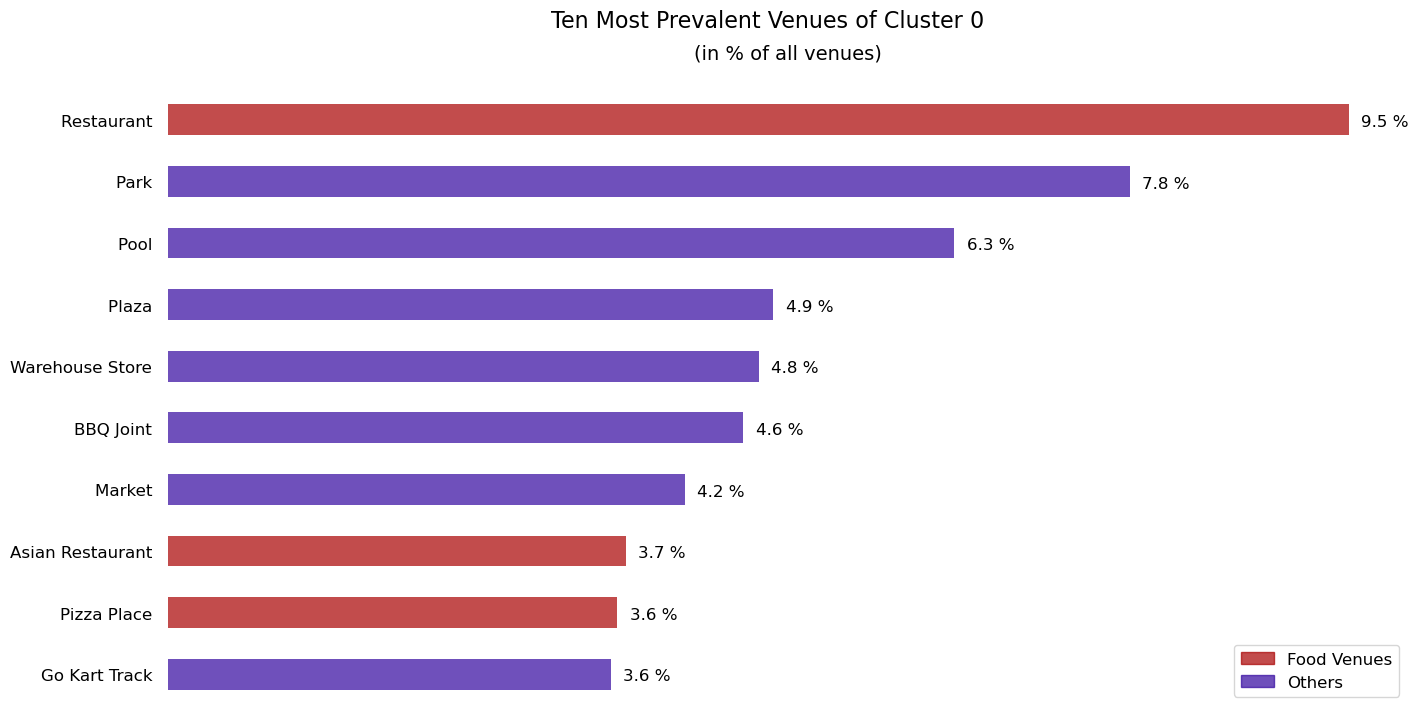

In [31]:
cluster0=pd.DataFrame(yerevan_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

,Hotel,Bed & Breakfast,Gourmet Shop,Pool,Lounge,Market,Plaza,Pizza Place,Park,Office,...,Furniture / Home Store,Eastern European Restaurant,French Restaurant,Food Court,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Electronics Store,Yoga Studio
Cluster 1,0.4,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


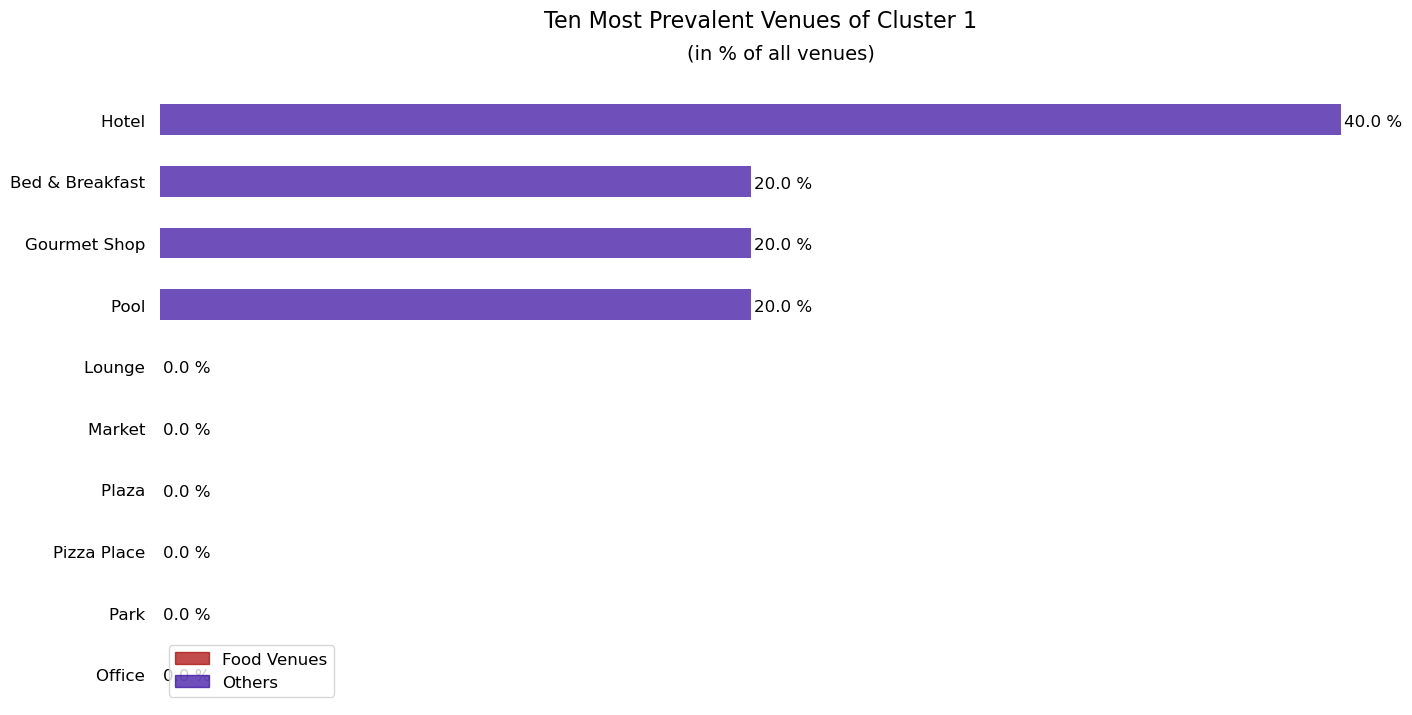

In [32]:
cluster1=pd.DataFrame(yerevan_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

In [74]:
clus1dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 1, yerevan_merged.columns[0]].values.tolist()
clus1dist = list(dict.fromkeys(clus1dist))
clus1dist

['Arabkir',
 'Avan',
 'Davtashen',
 'Erebuni',
 'Kanaker-Zeytun',
 'Kentron',
 'Nork-Marash']

In [75]:
clus0dist=yerevan_merged.loc[yerevan_merged['Cluster Label'] == 0, yerevan_merged.columns[0]].values.tolist()
clus0dist = list(dict.fromkeys(clus0dist))
clus0dist

['Nor Nork']

In [70]:
filtered_districts=venues.copy()

for i in range(0,len(filtered_districts)):

    if filtered_districts.iloc[i,0] not in clus0dist:
        filtered_districts.iloc[i,0]='TO DROP'

In [71]:
filtered_districts=filtered_districts[filtered_districts.District!='TO DROP']
filtered_districts.reset_index(drop=True,inplace=True)

In [72]:
filtered_districts.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arabkir,40.212991,44.480189,Yerevan Physics Institute Park | Երևանի ֆիզիկա...,40.204106,44.484004,Park
1,Arabkir,40.212991,44.480189,Tashir Pizza,40.218414,44.489403,Pizza Place
2,Arabkir,40.212991,44.480189,Kvartalplatz,40.211204,44.471614,Plaza
3,Arabkir,40.212991,44.480189,"Park of Republican hospital ""Lich/Լիճ""",40.205533,44.478537,Park
4,Arabkir,40.212991,44.480189,Gevorg Chaush square | Գևորգ Չաուշի հրապարակ,40.208989,44.468457,Plaza


In [65]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [66]:
def get_district_restaurants(url1):
    
    results = requests.get(url1).json()

    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a data frame
    dataframe = json_normalize(venues)

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    display(dataframe_filtered.loc[:,['name','categories','distance','lat','lng']])

In [67]:
category='4bf58dd8d48988d1c4941735'
radius = 1500
LIMIT=100

In [68]:
for n in range(0,len(filtered_districts)):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    filtered_districts.iloc[n,1], 
    filtered_districts.iloc[n,2], 
    VERSION, 
    category, 
    radius, 
    LIMIT)
    print('------------------------------------------------- '+ filtered_districts.iloc[n,0] + ' -------------------------------------------------')
    get_district_restaurants(url)
    print('\n\n')

------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Harich,Restaurant,1318,40.215662,44.495301
5,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,In Fusion,Restaurant,1443,40.221185,44.493354
6,Harich,Restaurant,1318,40.215662,44.495301
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,In Fusion,Restaurant,1443,40.221185,44.493354
5,Harich,Restaurant,1318,40.215662,44.495301
6,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,In Fusion,Restaurant,1443,40.221185,44.493354
6,Harich,Restaurant,1318,40.215662,44.495301
7,At the colonel,Restaurant,1523,40.216705,44.497438
8,Gandzaqar,Restaurant,1425,40.213074,44.496956





------------------------------------------------- Arabkir -------------------------------------------------


,name,categories,distance,lat,lng
0,Dolma,Restaurant,1222,40.219870,44.491397
1,Latar,Restaurant,1075,40.206126,44.471290
2,Odalen Restaurant,Restaurant,1181,40.215220,44.493776
3,Hrashq Aygi,Restaurant,1394,40.203384,44.469656
4,Genacvale Pandok,Restaurant,1895,40.206289,44.500680
5,Harich,Restaurant,1318,40.215662,44.495301
6,In Fusion,Restaurant,1443,40.221185,44.493354
7,Gandzaqar,Restaurant,1425,40.213074,44.496956
8,At the colonel,Restaurant,1523,40.216705,44.497438





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
3,Etna,Restaurant,1444,40.229839,44.542132
4,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Etna,Restaurant,1444,40.229839,44.542132
3,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
4,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
3,Etna,Restaurant,1444,40.229839,44.542132
4,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Avan -------------------------------------------------


,name,categories,distance,lat,lng
0,Мельница,Restaurant,942,40.217635,44.564908
1,Ginetun,Restaurant,1285,40.234763,44.560900
2,Etna,Restaurant,1444,40.229839,44.542132
3,Restaurant Hatisi Lanjin,Restaurant,1671,40.222936,44.576689
4,Aygi Hacatun,Restaurant,1787,40.239184,44.562109
5,"""Այգի"" հացատուն",Restaurant,845,40.224790,44.566860





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Davtashen -------------------------------------------------


,name,categories,distance,lat,lng
0,The Vahakni Restaurant,Restaurant,915,40.219349,44.457029
1,Ureni,Restaurant,1060,40.225565,44.452688





------------------------------------------------- Erebuni -------------------------------------------------


KeyError: "None of [Index(['name', 'categories', 'id'], dtype='object')] are in the [columns]"